In [2]:
import os
import numpy as np 
import pandas as pd 
from PIL import Image
import matplotlib.pylab as plt
import cv2
import seaborn as sns
sns.set()
def fetch_images(name,label):
    images = []
    labels = []
    for file in (os.listdir(name)):
        image = Image.open(name+file)
        x_image = image.resize((50,50))
        x_image = np.array(x_image)
        images.append(x_image) 
        labels.append(label)
    images = np.stack(images)
    labels = np.stack(labels)
    images = images/255 #normalized
    return images,labels

images_0,labels_0 = fetch_images("../data/0/",0)
images_1,labels_1 = fetch_images("../data/1/",1)
print(images_0.shape,images_1.shape)
print(labels_0.shape,labels_1.shape)
images = np.concatenate((images_0, images_1), axis=0)
labels=np.concatenate((labels_0, labels_1), axis=0)
print(images.shape,labels.shape)

(7160, 50, 50, 3) (2840, 50, 50, 3)
(7160,) (2840,)
(10000, 50, 50, 3) (10000,)


In [3]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(images,labels,random_state=0,test_size=0.33)

In [4]:
np.save("../data/x_train.npy",x_train)
np.save("../data/x_test.npy",x_test)
np.save("../data/y_train.npy",y_train)
np.save("../data/y_test.npy",y_test)

(6700, 50, 50, 3) (6700,)
(3300, 50, 50, 3) (3300,)


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


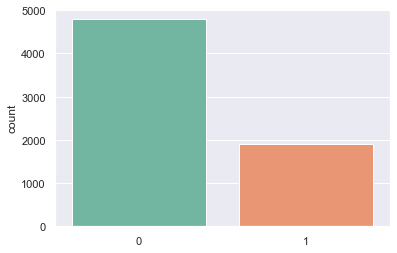

In [15]:
x_train=np.load("../data/x_train.npy")
x_test=np.load("../data/x_test.npy")
y_train=np.load("../data/y_train.npy")
y_test=np.load("../data/y_test.npy")
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
sns.countplot(y_train, palette="Set2");


D:\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


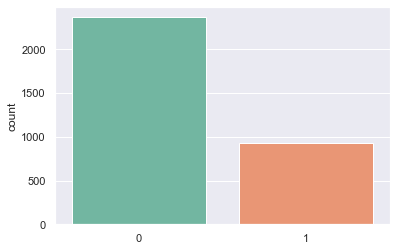

In [14]:
sns.countplot(y_test, palette="Set2");

(-0.5, 49.5, 49.5, -0.5)

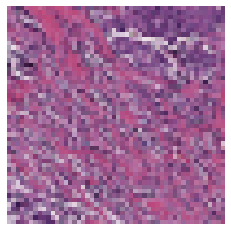

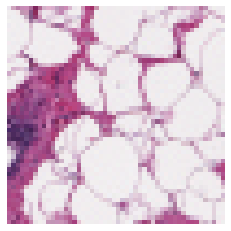

In [16]:
temp = x_train[0]
fig, ax = plt.subplots()
plt.imshow(temp)
ax.axis("off")
temp = x_test[1]
fig, ax = plt.subplots()
plt.imshow(temp)
ax.axis("off")